In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Face_Mask_Detection\\data\\with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
without_mask_files = os.listdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Face_Mask_Detection\\data\\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [4]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


###### Label Creation

mask = 1
without mask = 0

In [5]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [6]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [8]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


###### Preprocessing images

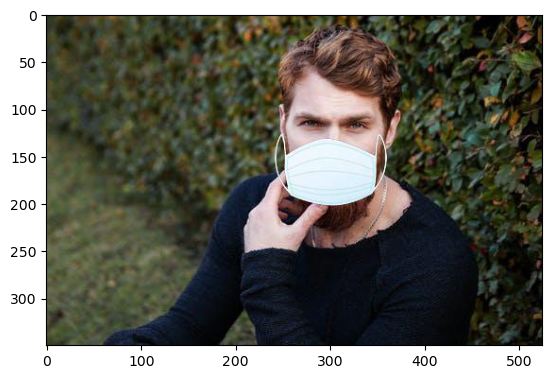

In [9]:
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Face_Mask_Detection\\data\\with_mask\\with_mask_1.jpg')
imgplt = plt.imshow(img)
plt.show()

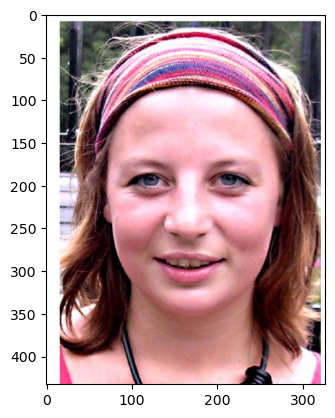

In [10]:
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Face_Mask_Detection\\data\\without_mask\\without_mask_996.jpg')
imgplt = plt.imshow(img)
plt.show()

###### Resizing images

In [11]:

with_mask_path = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Face_Mask_Detection\\data\\with_mask\\'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

    
without_mask_path = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Face_Mask_Detection\\data\\without_mask\\'


for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

C:\Users\Zooby\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(data)

list

In [13]:
len(data)

7553

In [14]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [15]:
data[0].shape

(128, 128, 3)

In [16]:
#converting images to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
X[0].shape

(128, 128, 3)

In [19]:
type(data)

list

In [20]:
type(X)

numpy.ndarray

###### Train Test split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


###### Scaling data

In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

###### Building a CNN

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
model = keras.Sequential()

#1st layer
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

#2nd layer
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

#3rd layer
model.add(keras.layers.Flatten())

#dense layers
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

#output layer
model.add(keras.layers.Dense(2, activation = 'sigmoid'))

C:\Users\Zooby\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
#compiling NN
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [28]:
#training NN

history = model.fit(X_train_scaled, Y_train, validation_split = .1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - acc: 0.6979 - loss: 0.6452 - val_acc: 0.8893 - val_loss: 0.2992
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - acc: 0.8754 - loss: 0.3294 - val_acc: 0.9107 - val_loss: 0.2332
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - acc: 0.9070 - loss: 0.2401 - val_acc: 0.9207 - val_loss: 0.2281
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - acc: 0.9177 - loss: 0.2156 - val_acc: 0.9157 - val_loss: 0.2325
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - acc: 0.9302 - loss: 0.1826 - val_acc: 0.9355 - val_loss: 0.1998


In [29]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9136 - loss: 0.2021
Test Loss = 0.20427417755126953
Test Accuracy = 0.9159497022628784


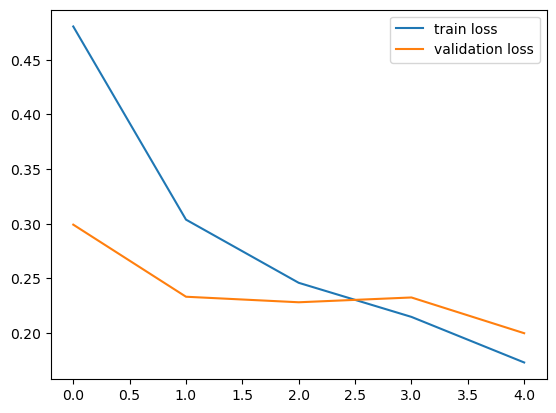

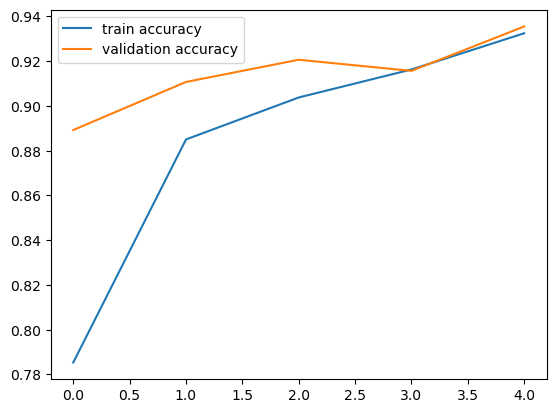

In [30]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: C:\\Users\\Zooby\\Desktop\\gender_test_images\\face_mask.jpg


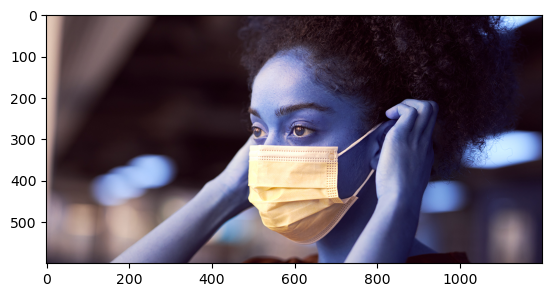

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.10539985 0.9352362 ]]
1
Mask


In [31]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('Mask')

else:
  print('No Mask')